In [200]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns
%matplotlib inline

# 小数第３まで表示
%precision 3

'%.3f'

In [201]:
Collision_data = pd.read_csv('NYC_accidents_heat_map.csv')
Collision_data.head()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/22/2017,0:00,BRONX,10453,40.861862,-73.912820,"(40.861862, -73.91282)",WEST FORDHAM ROAD,MAJOR DEEGAN EXPRESSWAY,NaN,...,Unspecified,NaN,NaN,NaN,3774361,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
1,10/22/2017,0:00,BROOKLYN,11211,40.714073,-73.950615,"(40.714073, -73.950615)",NaN,NaN,545 METROPOLITAN AVENUE,...,Other Vehicular,NaN,NaN,NaN,3774004,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
2,10/22/2017,0:00,MANHATTAN,10011,40.739136,-73.999260,"(40.739136, -73.99926)",NaN,NaN,77 7 AVENUE,...,Unspecified,NaN,NaN,NaN,3774254,TAXI,BU,NaN,NaN,NaN
3,10/22/2017,0:00,MANHATTAN,10025,40.794235,-73.962814,"(40.794235, -73.962814)",CENTRAL PARK WEST,WEST 100 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3774917,TAXI,TAXI,NaN,NaN,NaN
4,10/22/2017,0:00,QUEENS,11428,40.720375,-73.732260,"(40.720375, -73.73226)",JAMAICA AVENUE,222 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3774091,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


In [202]:
Collision_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139133 entries, 0 to 1139132
Data columns (total 29 columns):
DATE                             1139133 non-null object
TIME                             1139133 non-null object
BOROUGH                          821108 non-null object
ZIP CODE                         821029 non-null object
LATITUDE                         928495 non-null float64
LONGITUDE                        928495 non-null float64
LOCATION                         928495 non-null object
ON STREET NAME                   923773 non-null object
CROSS STREET NAME                875872 non-null object
OFF STREET NAME                  172400 non-null object
NUMBER OF PERSONS INJURED        1139133 non-null int64
NUMBER OF PERSONS KILLED         1139133 non-null int64
NUMBER OF PEDESTRIANS INJURED    1139133 non-null int64
NUMBER OF PEDESTRIANS KILLED     1139133 non-null int64
NUMBER OF CYCLIST INJURED        1139133 non-null int64
NUMBER OF CYCLIST KILLED         1139133 no

In [ ]:
per = Collision_data['DATE'].dt.to_period("M")
Collision_data.groupby(per)['NUMBER OF PERSONS KILLED'].sum()

In [ ]:
Dummy = pd.get_dummies(Collision_data['VEHICLE TYPE CODE 1'])

In [ ]:
ZIP = Collision_data['ZIP CODE']
ZIP_frame = pd.DataFrame(ZIP)
a = pd.concat([ZIP_frame, Dummy], axis=1)

In [ ]:
a = a.dropna()

In [ ]:
a.groupby('ZIP CODE').sum()

In [ ]:
b = a
for i in range(len(a.columns)-1):
    if a.iloc[:, len(a.columns) - i -1].sum()<500 :
        b = b.drop(a.columns[len(a.columns) - i -1],axis=1)

In [ ]:
b.head()

In [ ]:
b.groupby('ZIP CODE').sum()

In [ ]:
Collision_data.info()

In [276]:
data = Collision_data.loc[:,['LATITUDE','LONGITUDE','VEHICLE TYPE CODE 1']]

In [277]:
data.head()

,LATITUDE,LONGITUDE,VEHICLE TYPE CODE 1
0,40.861862,-73.912820,PASSENGER VEHICLE
1,40.714073,-73.950615,SPORT UTILITY / STATION WAGON
2,40.739136,-73.999260,TAXI
3,40.794235,-73.962814,TAXI
4,40.720375,-73.732260,SPORT UTILITY / STATION WAGON


In [207]:
data['la'] = data['LATITUDE'].map(lambda x : round(float(x),2))
data['lo'] = data['LONGITUDE'].map(lambda x : round(float(x),2))

In [208]:
data.head()

,LATITUDE,LONGITUDE,VEHICLE TYPE CODE 1,la,lo
0,40.861862,-73.912820,PASSENGER VEHICLE,40.86,-73.91
1,40.714073,-73.950615,SPORT UTILITY / STATION WAGON,40.71,-73.95
2,40.739136,-73.999260,TAXI,40.74,-74.00
3,40.794235,-73.962814,TAXI,40.79,-73.96
4,40.720375,-73.732260,SPORT UTILITY / STATION WAGON,40.72,-73.73


In [ ]:
import math
la=[]
lo=[]
for i  in range(len(data)):
    if data['LATITUDE'][i]== np.nan:
         la.append(np.nan)
    else:
        la.append(round(float(data['LATITUDE'][i]),3))
    if math.isnan(float(data['LONGITUDE'][i])) == 'TRUE':
         lo.append(np.nan)
    else:
        lo.append(round(float(data['LONGITUDE'][i]),3))
location = pd.DataFrame({'la':la,'lo':lo})

In [209]:
data = data.dropna()

In [210]:
location = data.loc[:,['la','lo']]

In [211]:
location.head()

,la,lo
0,40.86,-73.91
1,40.71,-73.95
2,40.74,-74.00
3,40.79,-73.96
4,40.72,-73.73


In [212]:
Dummy = pd.get_dummies(data['VEHICLE TYPE CODE 1'])

In [213]:
a = pd.concat([location, Dummy], axis=1)

In [214]:
a.head()

,la,lo,3D,AM,AMBUL,AMBULANCE,AR,BACKH,BICYCLE,BR,...,VAN,VN,VT,ambul,bus,east,horse,subn,unk,van
0,40.86,-73.91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.71,-73.95,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.74,-74.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40.79,-73.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.72,-73.73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [215]:
a = a.dropna()

In [216]:
b = a
for i in range(len(a.columns)-2):
    if a.iloc[:, len(a.columns) - i -1].sum()<500 :
        b = b.drop(a.columns[len(a.columns) - i -1],axis=1)

In [217]:
b.head()

,la,lo,AMBULANCE,BICYCLE,BUS,FIRE TRUCK,LARGE COM VEH(6 OR MORE TIRES),LIVERY VEHICLE,MOTORCYCLE,OTHER,PASSENGER VEHICLE,PICK-UP TRUCK,SMALL COM VEH(4 TIRES),SPORT UTILITY / STATION WAGON,TAXI,UNKNOWN,VAN
0,40.86,-73.91,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,40.71,-73.95,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,40.74,-74.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,40.79,-73.96,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,40.72,-73.73,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [218]:
vehicletype_data = b.groupby(['la','lo']).sum()

In [219]:
vehicletype_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 930 entries, (0.0, 0.0) to (41.13, -73.71)
Data columns (total 15 columns):
AMBULANCE                         930 non-null float64
BICYCLE                           930 non-null float64
BUS                               930 non-null float64
FIRE TRUCK                        930 non-null float64
LARGE COM VEH(6 OR MORE TIRES)    930 non-null float64
LIVERY VEHICLE                    930 non-null float64
MOTORCYCLE                        930 non-null float64
OTHER                             930 non-null float64
PASSENGER VEHICLE                 930 non-null float64
PICK-UP TRUCK                     930 non-null float64
SMALL COM VEH(4 TIRES)            930 non-null float64
SPORT UTILITY / STATION WAGON     930 non-null float64
TAXI                              930 non-null float64
UNKNOWN                           930 non-null float64
VAN                               930 non-null float64
dtypes: float64(15)
memory usage: 111.8 KB


In [220]:
vehicletype_data.head()

AMBULANCE  BICYCLE  BUS  FIRE TRUCK  \
la    lo                                            
0.00   0.00         0.0      2.0  0.0         0.0   
40.50 -74.25        0.0      0.0  0.0         0.0   
      -74.24        0.0      0.0  0.0         0.0   
      -74.23        0.0      0.0  0.0         0.0   
40.51 -74.25        0.0      0.0  2.0         1.0   

              LARGE COM VEH(6 OR MORE TIRES)  LIVERY VEHICLE  MOTORCYCLE  \
la    lo                                                                   
0.00   0.00                              0.0             0.0         1.0   
40.50 -74.25                             0.0             0.0         0.0   
      -74.24                             0.0             0.0         1.0   
      -74.23                             0.0             0.0         0.0   
40.51 -74.25                             1.0             0.0         0.0   

              OTHER  PASSENGER VEHICLE  PICK-UP TRUCK  \
la    lo                                                
0.00   0.00     0.0               39.0            4.0   
40.50 -74.25    1.0               18.0            0.0   
      -74.24    4.0               44.0            2.0   
      -74.23    1.0                2.0            0.0   
40.51 -74.25    5.0              134.0           10.0   

              SMALL COM VEH(4 TIRES)   SPORT UTILITY / STATION WAGON  TAXI  \
la    lo                                                                     
0.00   0.00                       0.0                           24.0   3.0   
40.50 -74.25                      0.0                           12.0   0.0   
      -74.24                      0.0                           14.0   0.0   
      -74.23                      0.0                            1.0   0.0   
40.51 -74.25                      4.0                           44.0   0.0   

              UNKNOWN  VAN  
la    lo                    
0.00   0.00       0.0  0.0  
40.50 -74.25      0.0  0.0  
      -74.24      0.0  1.0  
      -74.23      0.0  0.0  
40.51 -74.25      3.0  2.0

In [221]:
vehicletype_data = vehicletype_data.drop(0.00)
vehicletype_data = vehicletype_data.drop('UNKNOWN', axis = 1)
vehicletype_data =vehicletype_data.drop('OTHER', axis = 1)

In [222]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(vehicletype_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [223]:
pca.explained_variance_ratio_

array([ 0.945,  0.045,  0.008])

In [224]:
pca.components_

array([[  4.794e-03,   1.050e-02,   3.640e-02,   1.601e-03,   3.009e-02,
          2.633e-02,   1.044e-02,   8.986e-01,   3.854e-02,   3.750e-02,
          3.857e-01,   1.825e-01,   6.608e-02],
       [  3.283e-03,   1.817e-02,   9.312e-02,   2.225e-04,   6.837e-02,
          7.553e-02,   1.113e-02,  -1.919e-01,   8.220e-02,   1.053e-01,
         -6.775e-02,   9.441e-01,   1.729e-01],
       [ -1.363e-03,   6.757e-03,  -5.051e-03,  -1.332e-03,   4.026e-02,
          2.329e-02,   8.057e-03,  -3.939e-01,   1.692e-02,   2.301e-02,
          9.144e-01,  -3.514e-02,   6.639e-02]])

In [225]:
vehicletype_data.head()

AMBULANCE  BICYCLE  BUS  FIRE TRUCK  \
la    lo                                            
40.50 -74.25        0.0      0.0  0.0         0.0   
      -74.24        0.0      0.0  0.0         0.0   
      -74.23        0.0      0.0  0.0         0.0   
40.51 -74.25        0.0      0.0  2.0         1.0   
      -74.24        0.0      0.0  3.0         0.0   

              LARGE COM VEH(6 OR MORE TIRES)  LIVERY VEHICLE  MOTORCYCLE  \
la    lo                                                                   
40.50 -74.25                             0.0             0.0         0.0   
      -74.24                             0.0             0.0         1.0   
      -74.23                             0.0             0.0         0.0   
40.51 -74.25                             1.0             0.0         0.0   
      -74.24                             0.0             0.0         1.0   

              PASSENGER VEHICLE  PICK-UP TRUCK  SMALL COM VEH(4 TIRES)   \
la    lo                                                                  
40.50 -74.25               18.0            0.0                      0.0   
      -74.24               44.0            2.0                      0.0   
      -74.23                2.0            0.0                      0.0   
40.51 -74.25              134.0           10.0                      4.0   
      -74.24              167.0            8.0                      0.0   

              SPORT UTILITY / STATION WAGON  TAXI  VAN  
la    lo                                                
40.50 -74.25                           12.0   0.0  0.0  
      -74.24                           14.0   0.0  1.0  
      -74.23                            1.0   0.0  0.0  
40.51 -74.25                           44.0   0.0  2.0  
      -74.24                           69.0   0.0  5.0

In [226]:
df = vehicletype_data
for i in range(len(vehicletype_data.index)-1):
    if vehicletype_data.iloc[len(vehicletype_data.index)-i, 3:].sum()<5:
        df = df.drop(len(vehicletype_data.index) - i )

IndexError: single positional indexer is out-of-bounds

In [252]:
Dummy1 = pd.get_dummies(Collision_data['CONTRIBUTING FACTOR VEHICLE 1'])
aa = pd.concat([location, Dummy1], axis=1)

In [253]:
aa.head()

,la,lo,Accelerator Defective,Aggressive Driving/Road Rage,Alcohol Involvement,Animals Action,Backing Unsafely,Brakes Defective,Cell Phone (hand-held),Cell Phone (hands-free),...,Tire Failure/Inadequate,Tow Hitch Defective,Traffic Control Device Improper/Non-Working,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,View Obstructed/Limited,Windshield Inadequate
0,40.86,-73.91,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.71,-73.95,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40.74,-74.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40.79,-73.96,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.72,-73.73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [254]:
aa = aa.dropna()

In [255]:
bb = aa
for i in range(len(aa.columns)-2):
    if aa.iloc[:, len(aa.columns) - i -1].sum()<1000 :
        bb = bb.drop(aa.columns[len(aa.columns) - i -1],axis=1)

In [256]:
bb.head()

,la,lo,Aggressive Driving/Road Rage,Alcohol Involvement,Backing Unsafely,Brakes Defective,Driver Inattention/Distraction,Driver Inexperience,Failure to Keep Right,Failure to Yield Right-of-Way,...,Pedestrian/Bicyclist/Other Pedestrian Error/Confusion,Physical Disability,Prescription Medication,Reaction to Other Uninvolved Vehicle,Traffic Control Disregarded,Turning Improperly,Unsafe Lane Changing,Unsafe Speed,Unspecified,View Obstructed/Limited
0,40.86,-73.91,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.71,-73.95,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,40.74,-74.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,40.79,-73.96,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.72,-73.73,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921578 entries, 0 to 1139132
Data columns (total 34 columns):
la                                                       921578 non-null float64
lo                                                       921578 non-null float64
Aggressive Driving/Road Rage                             921578 non-null uint8
Alcohol Involvement                                      921578 non-null uint8
Backing Unsafely                                         921578 non-null uint8
Brakes Defective                                         921578 non-null uint8
Driver Inattention/Distraction                           921578 non-null uint8
Driver Inexperience                                      921578 non-null uint8
Failure to Keep Right                                    921578 non-null uint8
Failure to Yield Right-of-Way                            921578 non-null uint8
Fatigued/Drowsy                                          921578 non-null uint8
Fell Asleep    

In [258]:
factor_data = bb.groupby(['la','lo']).sum()

In [259]:
factor_data.head()

Aggressive Driving/Road Rage  Alcohol Involvement  \
la    lo                                                          
0.00   0.00                            0.0                  0.0   
40.50 -74.25                           0.0                  1.0   
      -74.24                           0.0                  3.0   
      -74.23                           0.0                  0.0   
40.51 -74.25                           0.0                  2.0   

              Backing Unsafely  Brakes Defective  \
la    lo                                           
0.00   0.00                2.0               0.0   
40.50 -74.25               0.0               0.0   
      -74.24               0.0               0.0   
      -74.23               0.0               0.0   
40.51 -74.25               6.0               0.0   

              Driver Inattention/Distraction  Driver Inexperience  \
la    lo                                                            
0.00   0.00                             18.0                  0.0   
40.50 -74.25                             4.0                  1.0   
      -74.24                             6.0                  2.0   
      -74.23                             0.0                  0.0   
40.51 -74.25                            24.0                  4.0   

              Failure to Keep Right  Failure to Yield Right-of-Way  \
la    lo                                                             
0.00   0.00                     0.0                            4.0   
40.50 -74.25                    0.0                            2.0   
      -74.24                    0.0                            5.0   
      -74.23                    0.0                            0.0   
40.51 -74.25                    1.0                            9.0   

              Fatigued/Drowsy  Fell Asleep           ...             \
la    lo                                             ...              
0.00   0.00               0.0          0.0           ...              
40.50 -74.25              0.0          0.0           ...              
      -74.24              1.0          0.0           ...              
      -74.23              0.0          0.0           ...              
40.51 -74.25              0.0          0.0           ...              

              Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  \
la    lo                                                              
0.00   0.00                                                 0.0       
40.50 -74.25                                                0.0       
      -74.24                                                0.0       
      -74.23                                                0.0       
40.51 -74.25                                                0.0       

              Physical Disability  Prescription Medication  \
la    lo                                                     
0.00   0.00                   0.0                      0.0   
40.50 -74.25                  0.0                      0.0   
      -74.24                  0.0                      0.0   
      -74.23                  0.0                      0.0   
40.51 -74.25                  1.0                      0.0   

              Reaction to Other Uninvolved Vehicle  \
la    lo                                             
0.00   0.00                                    0.0   
40.50 -74.25                                   0.0   
      -74.24                                   0.0   
      -74.23                                   0.0   
40.51 -74.25                                   2.0   

              Traffic Control Disregarded  Turning Improperly  \
la    lo                                                        
0.00   0.00                           3.0                 1.0   
40.50 -74.25                          0.0                 0.0   
      -74.24                          0.0                 1.0   
      -74.23                          0.0                 0.0   
40.5

In [260]:
factor_data = factor_data.drop(0.00)
factor_data = factor_data.drop('Unspecified', axis = 1)

In [261]:
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 929 entries, (40.5, -74.25) to (41.13, -73.71)
Data columns (total 31 columns):
Aggressive Driving/Road Rage                             929 non-null float64
Alcohol Involvement                                      929 non-null float64
Backing Unsafely                                         929 non-null float64
Brakes Defective                                         929 non-null float64
Driver Inattention/Distraction                           929 non-null float64
Driver Inexperience                                      929 non-null float64
Failure to Keep Right                                    929 non-null float64
Failure to Yield Right-of-Way                            929 non-null float64
Fatigued/Drowsy                                          929 non-null float64
Fell Asleep                                              929 non-null float64
Following Too Closely                                    929 non-null float64
Glare       

In [262]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(factor_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [263]:
pca.explained_variance_ratio_

array([ 0.836,  0.078,  0.04 ])

In [264]:
pca.components_

array([[  1.668e-02,   2.788e-02,   1.325e-01,   9.845e-03,   8.406e-01,
          7.780e-02,   5.772e-03,   2.028e-01,   2.207e-01,   4.020e-03,
          8.392e-02,   4.261e-03,   2.366e-02,   1.452e-01,   8.936e-03,
          1.101e-02,   2.968e-01,   4.207e-02,   4.385e-02,   3.407e-02,
          5.793e-02,   2.677e-02,   9.226e-03,   3.559e-02,   9.726e-02,
          1.922e-02,   4.496e-02,   1.901e-01,   5.476e-02,   1.056e-02,
          1.817e-02],
       [ -3.209e-03,  -2.760e-02,  -1.244e-01,  -2.451e-03,  -1.788e-01,
          3.284e-02,  -3.949e-03,  -1.796e-01,  -1.645e-01,  -2.864e-03,
         -7.435e-02,  -5.668e-03,  -9.290e-04,  -1.010e-01,  -3.136e-03,
         -5.559e-03,   9.296e-01,  -1.511e-02,  -5.805e-02,  -1.759e-02,
         -4.460e-02,  -3.081e-02,  -6.871e-03,  -2.304e-02,  -3.836e-02,
         -7.280e-03,  -4.451e-02,  -1.081e-02,  -1.199e-02,  -1.051e-02,
         -1.267e-02],
       [  8.733e-03,   3.527e-03,   1.825e-01,   7.641e-03,  -4.957e-01,
       

In [265]:
factor_data.head()

Aggressive Driving/Road Rage  Alcohol Involvement  \
la    lo                                                          
40.50 -74.25                           0.0                  1.0   
      -74.24                           0.0                  3.0   
      -74.23                           0.0                  0.0   
40.51 -74.25                           0.0                  2.0   
      -74.24                           0.0                  2.0   

              Backing Unsafely  Brakes Defective  \
la    lo                                           
40.50 -74.25               0.0               0.0   
      -74.24               0.0               0.0   
      -74.23               0.0               0.0   
40.51 -74.25               6.0               0.0   
      -74.24               7.0               2.0   

              Driver Inattention/Distraction  Driver Inexperience  \
la    lo                                                            
40.50 -74.25                             4.0                  1.0   
      -74.24                             6.0                  2.0   
      -74.23                             0.0                  0.0   
40.51 -74.25                            24.0                  4.0   
      -74.24                            21.0                  2.0   

              Failure to Keep Right  Failure to Yield Right-of-Way  \
la    lo                                                             
40.50 -74.25                    0.0                            2.0   
      -74.24                    0.0                            5.0   
      -74.23                    0.0                            0.0   
40.51 -74.25                    1.0                            9.0   
      -74.24                    0.0                           12.0   

              Fatigued/Drowsy  Fell Asleep           ...             \
la    lo                                             ...              
40.50 -74.25              0.0          0.0           ...              
      -74.24              1.0          0.0           ...              
      -74.23              0.0          0.0           ...              
40.51 -74.25              0.0          0.0           ...              
      -74.24              2.0          1.0           ...              

              Pavement Slippery  \
la    lo                          
40.50 -74.25                0.0   
      -74.24                0.0   
      -74.23                0.0   
40.51 -74.25                2.0   
      -74.24                3.0   

              Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  \
la    lo                                                              
40.50 -74.25                                                0.0       
      -74.24                                                0.0       
      -74.23                                                0.0       
40.51 -74.25                                                0.0       
      -74.24                                                0.0       

              Physical Disability  Prescription Medication  \
la    lo                                                     
40.50 -74.25                  0.0                      0.0   
      -74.24                  0.0                      0.0   
      -74.23                  0.0                      0.0   
40.51 -74.25                  1.0                      0.0   
      -74.24                  0.0                      1.0   

              Reaction to Other Uninvolved Vehicle  \
la    lo                                             
40.50 -74.25                                   0.0   
      -74.24                                   0.0   
      -74.23                                   0.0   
40.51 -74.25                                   2.0   
      -74.24                                   1.0   

              Traffic Control Disregarded  Turning Improperly  \
la    lo                                                        
40.50 -74.25      

In [266]:
factor_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 929 entries, (40.5, -74.25) to (41.13, -73.71)
Data columns (total 31 columns):
Aggressive Driving/Road Rage                             929 non-null float64
Alcohol Involvement                                      929 non-null float64
Backing Unsafely                                         929 non-null float64
Brakes Defective                                         929 non-null float64
Driver Inattention/Distraction                           929 non-null float64
Driver Inexperience                                      929 non-null float64
Failure to Keep Right                                    929 non-null float64
Failure to Yield Right-of-Way                            929 non-null float64
Fatigued/Drowsy                                          929 non-null float64
Fell Asleep                                              929 non-null float64
Following Too Closely                                    929 non-null float64
Glare       

In [267]:
F = factor_data
for i in range(len(factor_data.index)-2):
    if factor_data.iloc[len(factor_data.index) - i -1, :].sum()<100:
        F = F.drop(factor_data.index[len(factor_data.index) - i -1],axis=0)

In [268]:
F.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 692 entries, (40.5, -74.25) to (40.91, -73.9)
Data columns (total 31 columns):
Aggressive Driving/Road Rage                             692 non-null float64
Alcohol Involvement                                      692 non-null float64
Backing Unsafely                                         692 non-null float64
Brakes Defective                                         692 non-null float64
Driver Inattention/Distraction                           692 non-null float64
Driver Inexperience                                      692 non-null float64
Failure to Keep Right                                    692 non-null float64
Failure to Yield Right-of-Way                            692 non-null float64
Fatigued/Drowsy                                          692 non-null float64
Fell Asleep                                              692 non-null float64
Following Too Closely                                    692 non-null float64
Glare        

In [269]:
F.head()

Aggressive Driving/Road Rage  Alcohol Involvement  \
la    lo                                                          
40.50 -74.25                           0.0                  1.0   
      -74.24                           0.0                  3.0   
40.52 -74.24                           0.0                  5.0   
      -74.23                           1.0                  3.0   
40.53 -74.19                           0.0                  2.0   

              Backing Unsafely  Brakes Defective  \
la    lo                                           
40.50 -74.25               0.0               0.0   
      -74.24               0.0               0.0   
40.52 -74.24              12.0               0.0   
      -74.23              20.0               3.0   
40.53 -74.19              11.0               0.0   

              Driver Inattention/Distraction  Driver Inexperience  \
la    lo                                                            
40.50 -74.25                             4.0                  1.0   
      -74.24                             6.0                  2.0   
40.52 -74.24                            38.0                  1.0   
      -74.23                            42.0                  4.0   
40.53 -74.19                            41.0                  3.0   

              Failure to Keep Right  Failure to Yield Right-of-Way  \
la    lo                                                             
40.50 -74.25                    0.0                            2.0   
      -74.24                    0.0                            5.0   
40.52 -74.24                    0.0                            9.0   
      -74.23                    0.0                           15.0   
40.53 -74.19                    0.0                           14.0   

              Fatigued/Drowsy  Fell Asleep           ...             \
la    lo                                             ...              
40.50 -74.25              0.0          0.0           ...              
      -74.24              1.0          0.0           ...              
40.52 -74.24              4.0          0.0           ...              
      -74.23              9.0          0.0           ...              
40.53 -74.19              6.0          1.0           ...              

              Pavement Slippery  \
la    lo                          
40.50 -74.25                0.0   
      -74.24                0.0   
40.52 -74.24                2.0   
      -74.23                7.0   
40.53 -74.19                4.0   

              Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  \
la    lo                                                              
40.50 -74.25                                                0.0       
      -74.24                                                0.0       
40.52 -74.24                                                0.0       
      -74.23                                                0.0       
40.53 -74.19                                                1.0       

              Physical Disability  Prescription Medication  \
la    lo                                                     
40.50 -74.25                  0.0                      0.0   
      -74.24                  0.0                      0.0   
40.52 -74.24                  1.0                      1.0   
      -74.23                  0.0                      3.0   
40.53 -74.19                  1.0                      2.0   

              Reaction to Other Uninvolved Vehicle  \
la    lo                                             
40.50 -74.25                                   0.0   
      -74.24                                   0.0   
40.52 -74.24                                   1.0   
      -74.23                                   0.0   
40.53 -74.19                                   2.0   

              Traffic Control Disregarded  Turning Improperly  \
la    lo                                                        
40.50 -74.25      

In [270]:
G=F
for i in range(len(F.index)):
    for j in range(len(F.columns)):
        G.iloc[i,j] = F.iloc[i,j] / F.iloc[i,:].sum()
        

In [271]:
G.head()

Aggressive Driving/Road Rage  Alcohol Involvement  \
la    lo                                                          
40.50 -74.25                      0.000000             0.111111   
      -74.24                      0.000000             0.130435   
40.52 -74.24                      0.000000             0.049020   
      -74.23                      0.007576             0.022899   
40.53 -74.19                      0.000000             0.016393   

              Backing Unsafely  Brakes Defective  \
la    lo                                           
40.50 -74.25          0.000000           0.00000   
      -74.24          0.000000           0.00000   
40.52 -74.24          0.123649           0.00000   
      -74.23          0.156213           0.02773   
40.53 -74.19          0.091654           0.00000   

              Driver Inattention/Distraction  Driver Inexperience  \
la    lo                                                            
40.50 -74.25                        0.493151             0.217190   
      -74.24                        0.298056             0.138615   
40.52 -74.24                        0.446153             0.021000   
      -74.23                        0.399185             0.062880   
40.53 -74.19                        0.375774             0.043806   

              Failure to Keep Right  Failure to Yield Right-of-Way  \
la    lo                                                             
40.50 -74.25                    0.0                       0.523361   
      -74.24                    0.0                       0.397864   
40.52 -74.24                    0.0                       0.192968   
      -74.23                    0.0                       0.251355   
40.53 -74.19                    0.0                       0.213650   

              Fatigued/Drowsy  Fell Asleep           ...             \
la    lo                                             ...              
40.50 -74.25         0.000000     0.000000           ...              
      -74.24         0.125550     0.000000           ...              
40.52 -74.24         0.105728     0.000000           ...              
      -74.23         0.200321     0.000000           ...              
40.53 -74.19         0.115962     0.021807           ...              

              Pavement Slippery  \
la    lo                          
40.50 -74.25           0.000000   
      -74.24           0.000000   
40.52 -74.24           0.127462   
      -74.23           0.373024   
40.53 -74.19           0.141206   

              Pedestrian/Bicyclist/Other Pedestrian Error/Confusion  \
la    lo                                                              
40.50 -74.25                                           0.000000       
      -74.24                                           0.000000       
40.52 -74.24                                           0.000000       
      -74.23                                           0.000000       
40.53 -74.19                                           0.040869       

              Physical Disability  Prescription Medication  \
la    lo                                                     
40.50 -74.25             0.000000                 0.000000   
      -74.24             0.000000                 0.000000   
40.52 -74.24             0.072367                 0.077575   
      -74.23             0.000000                 0.247146   
40.53 -74.19             0.042536                 0.088684   

              Reaction to Other Uninvolved Vehicle  \
la    lo                                             
40.50 -74.25                              0.000000   
      -74.24                              0.000000   
40.52 -74.24                              0.083554   
      -74.23                              0.000000   
40.53 -74.19                              0.096896   

              Traffic Control Disregarded  Turning Improperly  \
la    lo                                                        
40.50 -74.25      

In [272]:
G.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 692 entries, (40.5, -74.25) to (40.91, -73.9)
Data columns (total 31 columns):
Aggressive Driving/Road Rage                             692 non-null float64
Alcohol Involvement                                      692 non-null float64
Backing Unsafely                                         692 non-null float64
Brakes Defective                                         692 non-null float64
Driver Inattention/Distraction                           692 non-null float64
Driver Inexperience                                      692 non-null float64
Failure to Keep Right                                    692 non-null float64
Failure to Yield Right-of-Way                            692 non-null float64
Fatigued/Drowsy                                          692 non-null float64
Fell Asleep                                              692 non-null float64
Following Too Closely                                    692 non-null float64
Glare        

In [275]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(G)
pca.explained_variance_ratio_

array([ 0.27 ,  0.254])

In [249]:
pca.components_

array([[ -2.136e-03,   5.814e-03,  -1.713e-02,   1.344e-03,   6.080e-03,
          5.858e-04,   7.429e-03,   1.595e-02,   4.977e-02,   9.879e-03,
          1.170e-01,   1.514e-02,  -6.201e-03,  -7.115e-02,   8.421e-03,
         -1.110e-03,  -6.713e-02,   2.440e-02,  -5.142e-02,  -4.185e-02,
         -3.968e-02,   1.051e-01,  -1.569e-02,  -7.202e-03,  -1.247e-01,
          3.266e-02,   1.196e-01,  -2.197e-01,  -2.434e-01,   2.080e-01,
         -8.795e-01],
       [ -5.569e-04,  -1.611e-02,  -6.231e-02,  -2.391e-03,  -1.156e-01,
         -3.594e-02,  -4.826e-03,  -2.275e-01,   1.368e-01,  -6.284e-03,
          1.651e-01,  -1.129e-02,   2.332e-04,  -4.637e-03,   6.081e-03,
         -4.897e-03,   4.090e-02,   4.053e-02,  -2.010e-02,  -2.219e-02,
          5.726e-03,  -5.046e-02,  -1.373e-02,  -1.589e-01,  -9.439e-02,
          7.752e-03,  -2.806e-01,   2.998e-01,   7.624e-01,   1.764e-01,
         -2.471e-01]])

[ 0.27   0.254]


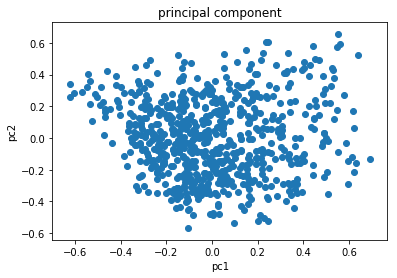

In [250]:
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(G)
# 主成分をプロットする
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)

# グラフを表示する


plt.show()

In [251]:
transformed_frame = pd.DataFrame(transformed)
transformed_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 2 columns):
0    692 non-null float64
1    692 non-null float64
dtypes: float64(2)
memory usage: 10.9 KB


In [183]:
for i in range(len(G.index)):
    if transformed_frame.iloc[i,0]>0.1:
        print(G.index[i])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
.to_csv("factor_place.csv")

[ 0.425  0.15   0.136]


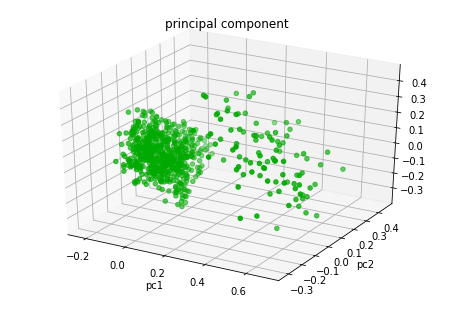

In [153]:
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca.fit(G)

#分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(G)
# 主成分をプロットする
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(transformed[:, 0], transformed[:, 1],transformed[:, 2], color="#00aa00")
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)

# グラフを表示する
plt.show()

In [163]:
V = vehicletype_data

for i in range(len(vehicletype_data.index)-2):
    if vehicletype_data.iloc[len(vehicletype_data.index) - i -1, :].sum()<150:   ##検討の余地あり
        V = V.drop(vehicletype_data.index[len(vehicletype_data.index) - i -1],axis=0)


In [165]:
U=V
for i in range(len(V.index)):
    for j in range(len(V.columns)):
        U.iloc[i,j] = V.iloc[i,j] / V.iloc[i,:].sum()
        

In [169]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(U)
pca.explained_variance_ratio_

array([ 0.642,  0.273])

[ 0.642  0.273]


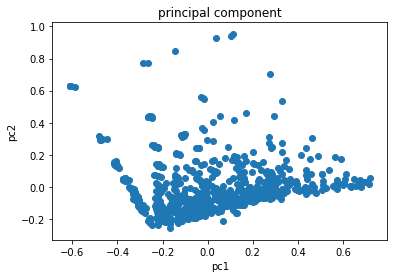

In [170]:
# 分析結果を元にデータセットを主成分に変換する
transformed = pca.fit_transform(U)
# 主成分をプロットする
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.title('principal component')
plt.xlabel('pc1')
plt.ylabel('pc2')

# 主成分の次元ごとの寄与率を出力する
print(pca.explained_variance_ratio_)

# グラフを表示する
plt.show()